COVID-19

In [120]:
import pandas as pd

In [127]:
# Загружаем данные о заболевших, умерших и выздоровевших
covid_data = pd.read_csv(r"C:/Users/dmikh/OneDrive - Gamma International Group/IDE/Data/Covid-19/covid_19_data.csv")
display(covid_data.head())

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [128]:
# Загружаем данные о вакцинации
vaccinations_data = pd.read_csv(r"C:/Users/dmikh/OneDrive - Gamma International Group/IDE/Data/Covid-19/country_vaccinations.csv")
display(vaccinations_data.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [132]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по каждому регионам
covid_data = covid_data.groupby(
    ['ObservationDate', 'Country/Region'], 
    as_index=False
)[['Confirmed', 'Deaths', 'Recovered']].sum()
display(covid_data.head())

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0


In [138]:
# Преобразуем даты в формат datetime
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [134]:
# Создадим признак больных на данный момент (active)
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']

In [135]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей
covid_data = covid_data.sort_values(by=['Country/Region', 'ObservationDate'])
covid_data['Daily_confirmed'] = covid_data.groupby('Country/Region')['Confirmed'].diff()
covid_data['Daily_deaths'] = covid_data.groupby('Country/Region')['Deaths'].diff()
covid_data['Daily_recovered'] = covid_data.groupby('Country/Region')['Recovered'].diff()

In [137]:
covid_data.head(20)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active,Daily_confirmed,Daily_deaths,Daily_recovered
12394,2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
15308,2020-03-10,"('St. Martin',)",2.0,0.0,0.0,2.0,NaN,NaN,NaN
11424,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11659,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11898,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12144,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12395,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12652,2020-02-29,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12717,2020-03-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12982,2020-03-02,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [140]:
# За какой период представлены данные в таблице covid_data?
print(covid_data['ObservationDate'].min())
print(covid_data['ObservationDate'].max())

2020-01-22 00:00:00
2021-05-29 00:00:00


In [141]:
# За какой период представлены данные в таблице vaccinations_data?
print(vaccinations_data['date'].min())
print(vaccinations_data['date'].max())

2020-12-02 00:00:00
2022-03-29 00:00:00


In [146]:
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country
# В результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data
covid_df = covid_data.merge(vaccinations_data, how='left', left_on=['ObservationDate','Country/Region'], right_on=['date','country'])

In [148]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87281 entries, 0 to 87280
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ObservationDate                      87281 non-null  datetime64[ns]
 1   Country/Region                       87281 non-null  object        
 2   Confirmed                            87281 non-null  float64       
 3   Deaths                               87281 non-null  float64       
 4   Recovered                            87281 non-null  float64       
 5   Active                               87281 non-null  float64       
 6   Daily_confirmed                      87052 non-null  float64       
 7   Daily_deaths                         87052 non-null  float64       
 8   Daily_recovered                      87052 non-null  float64       
 9   country                              17928 non-null  object        
 10  iso_code  

In [157]:
# В получившейся таблице covid_df создайте признаки death_rate и recover_rate
covid_df['death_rate'] = (covid_df['Deaths'] / covid_df['Confirmed']) * 100
covid_df['recover_rate'] = (covid_df['Recovered'] / covid_df['Confirmed']) * 100



In [169]:
# Какова максимальная летальность в США (United States) за весь период?
covid_df[covid_df['Country/Region'] == 'US'].groupby('Country/Region')['death_rate'].max()

Country/Region
US    7.189542
Name: death_rate, dtype: float64

In [172]:
# Чему равен средний процент выздоровевших в России (Russia)?
covid_df[covid_df['Country/Region'] == 'Russia'].groupby('Country/Region')['recover_rate'].mean()

Country/Region
Russia    67.062735
Name: recover_rate, dtype: float64

<AxesSubplot: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='ObservationDate'>

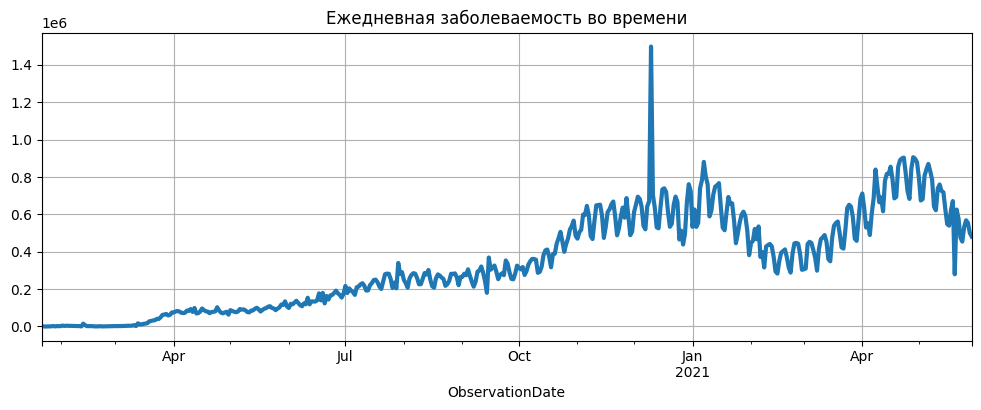

In [174]:
# Строим линейный график общей ежедневной заболеваемости во времени
grouped_cases = covid_df.groupby('ObservationDate')['Daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)

<AxesSubplot: title={'center': 'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

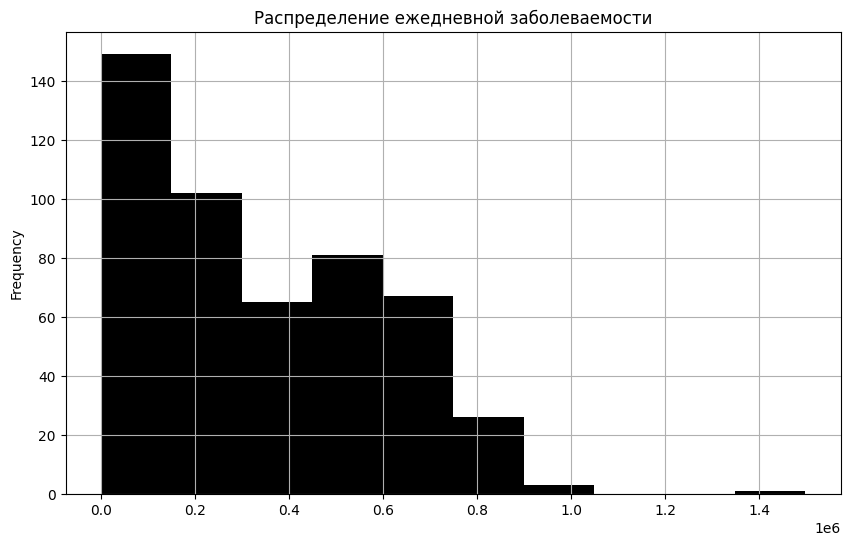

In [175]:
# Построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
)

<AxesSubplot: xlabel='Country/Region'>

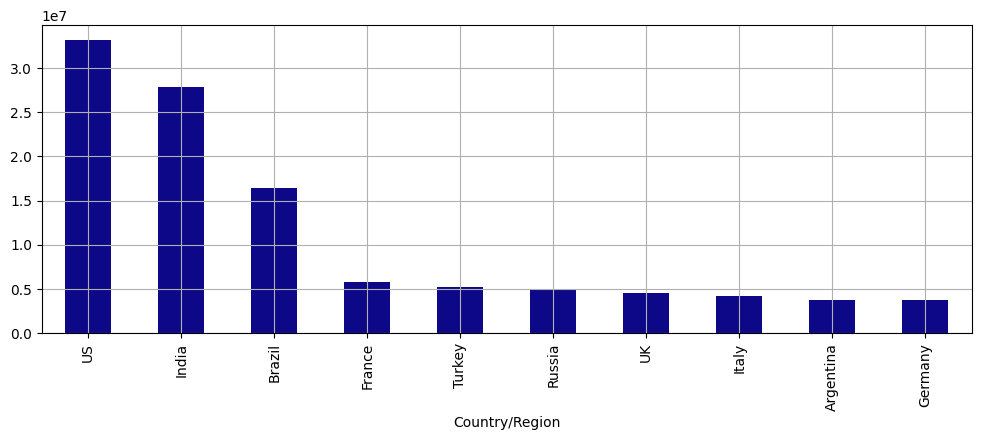

In [176]:
# Построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости
grouped_country = covid_df.groupby(['Country/Region'])['Confirmed'].last() # определяем последнее значение Confirmed для каждой страны
grouped_country = grouped_country.nlargest(10) # отсекаем топ-10
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)

<AxesSubplot: xlabel='Country/Region'>

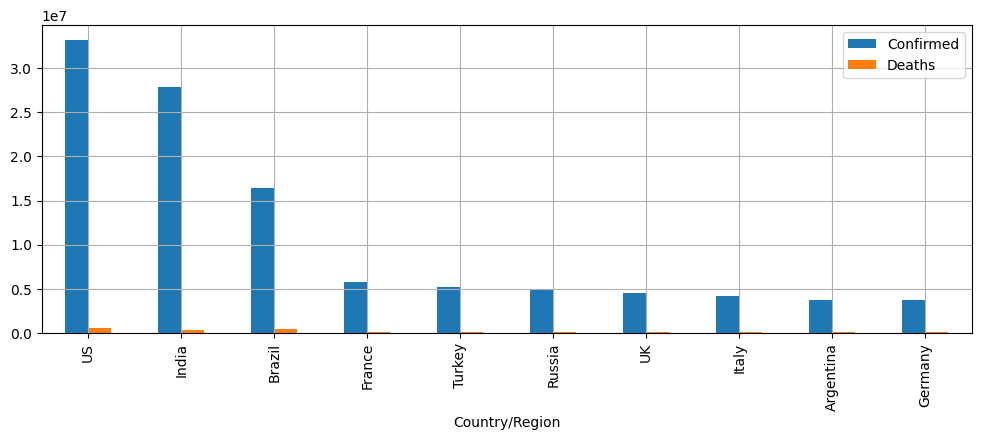

In [177]:
# А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса.
grouped_country = covid_df.groupby(['Country/Region'])[['Confirmed', 'Deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['Confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4),
)